<a href="https://colab.research.google.com/github/sharan11/Intro-to-Deep-Learning-with-Pytorch-Exercise-Solutions/blob/master/Neural_Networks_in_PyTorch_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
# Getting the dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
for image, label in trainloader:
  print(image[0],label[0])
  break

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


This is what one of the images looks like.

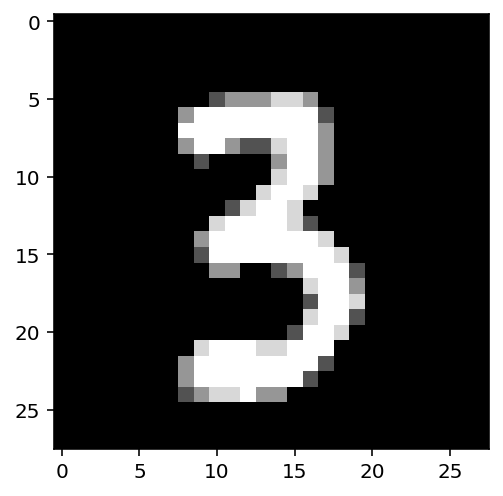

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

**Exercise**: Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [0]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [0]:
## Your solution
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Flatten the input images
inputs = images.view(images.shape[0], -1)

n_hidden = 256                  # Number of hidden units 
n_output = 10                   # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(784, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

h = activation(torch.mm(inputs, W1) + B1)

out = torch.mm(h, W2) + B2 # output of your network, should have shape (64,10)

In [10]:
out.shape

torch.Size([64, 10])

In [11]:
torch.exp(out[0])

tensor([1.7717e-06, 1.9555e-03, 4.0266e+00, 5.1992e-03, 1.3512e+00, 7.5708e+04,
        1.5943e-01, 1.0257e+01, 3.3998e-08, 5.6933e+00])

**Exercise**: Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.

In [12]:
def softmax(x):
    ## TODO: Implement the softmax function here
    ## solution
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1,1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Building networks with PyTorch

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(784,256)
    # Output layer, 10 units - one for each digit
    self.output = nn.Linear(256,10)
    # Define sigmoid activation and softmax output
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x):
    # Pass the input tensor through each of our operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

In [15]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

**Exercise**: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to first hidden layer linear transformation
        self.hidden1 = nn.Linear(784, 128)
        # Inputs to second hidden layer linear transformation
        self.hidden2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # First hidden layer with Relu activation
        x = F.relu(self.hidden1(x))
        # Second hidden layer with Relu activation
        x = F.relu(self.hidden2(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [18]:
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

In [19]:

print(model.hidden1.weight)
print(model.hidden1.bias)

Parameter containing:
tensor([[ 0.0019,  0.0005, -0.0266,  ...,  0.0021,  0.0257,  0.0180],
        [-0.0291,  0.0194,  0.0033,  ..., -0.0058, -0.0152, -0.0074],
        [-0.0255,  0.0141, -0.0173,  ..., -0.0066,  0.0269,  0.0035],
        ...,
        [-0.0114,  0.0222,  0.0197,  ...,  0.0243,  0.0304,  0.0111],
        [-0.0090, -0.0345, -0.0355,  ..., -0.0130,  0.0239, -0.0339],
        [ 0.0088,  0.0205,  0.0327,  ..., -0.0091,  0.0315,  0.0055]],
       requires_grad=True)
Parameter containing:
tensor([-0.0006, -0.0100,  0.0276, -0.0134, -0.0039,  0.0245, -0.0207,  0.0039,
        -0.0155,  0.0004,  0.0028, -0.0305,  0.0163,  0.0109, -0.0037,  0.0187,
         0.0095,  0.0269, -0.0096, -0.0019, -0.0355,  0.0344,  0.0178, -0.0305,
        -0.0307, -0.0113, -0.0355,  0.0336, -0.0058, -0.0032,  0.0309,  0.0017,
         0.0203, -0.0101,  0.0036, -0.0251, -0.0256, -0.0087,  0.0092, -0.0355,
         0.0127, -0.0146, -0.0254, -0.0126, -0.0269,  0.0212,  0.0112, -0.0237,
         0.0278

In [20]:
# Set biases to all zeros
model.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
# sample from random normal with standard dev = 0.01
model.hidden1.weight.data.normal_(std=0.01)

tensor([[ 0.0013, -0.0097, -0.0107,  ...,  0.0088, -0.0066,  0.0040],
        [-0.0093,  0.0021,  0.0107,  ...,  0.0003,  0.0007,  0.0027],
        [ 0.0085, -0.0038,  0.0023,  ..., -0.0218, -0.0126,  0.0017],
        ...,
        [ 0.0034, -0.0230,  0.0046,  ...,  0.0049, -0.0056,  0.0109],
        [-0.0020,  0.0027, -0.0104,  ...,  0.0089, -0.0030,  0.0080],
        [ 0.0027,  0.0078, -0.0043,  ..., -0.0089,  0.0020,  0.0119]])

### Forward pass
Now that we have a network, let's see what happens when we pass in an image.

In [0]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [23]:
# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

tensor([[[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        ...,

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.]]])

In [0]:
# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

In [36]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2019-11-08 10:30:10--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-11-08 10:30:10 (48.0 MB/s) - ‘helper.py’ saved [2813/2813]



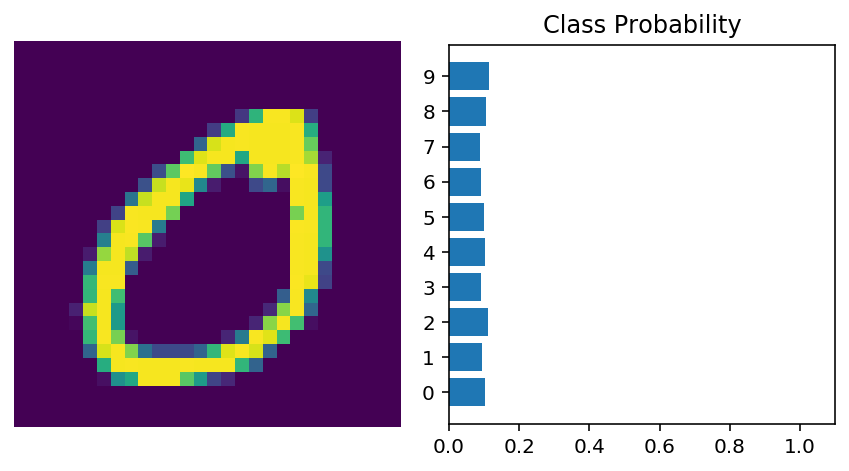

In [59]:
img = images[img_idx]

view_classify(img.view(1, 28, 28), ps)

### View classify function from helper.py is not working for me, so I copied the function from the file and run it below

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

## Using nn.Sequential

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


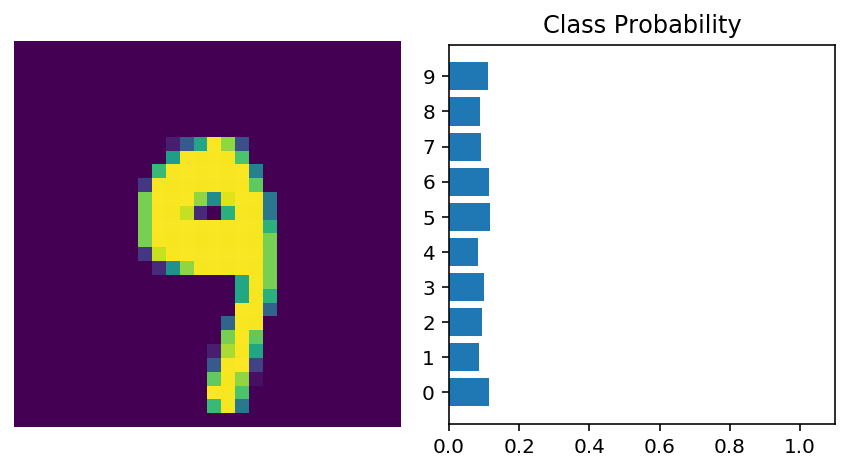

In [60]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [61]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-2.9862e-02, -1.2659e-02, -2.5101e-02,  ...,  3.0596e-02,
         -5.9958e-04,  2.2081e-02],
        [-9.4624e-03, -7.8931e-03, -2.8510e-02,  ..., -2.0721e-02,
         -2.2098e-03, -1.5894e-02],
        [-2.8786e-02,  1.1147e-02,  1.9667e-02,  ...,  1.0853e-02,
          6.3184e-04, -5.0848e-03],
        ...,
        [ 1.9110e-02,  3.5534e-02, -2.1601e-02,  ..., -2.2419e-02,
         -1.5546e-05, -8.2923e-03],
        [-2.9006e-02, -5.3848e-04,  1.9616e-02,  ..., -1.4155e-02,
          1.3010e-02, -2.3179e-02],
        [ 1.6492e-02,  9.2524e-03, -1.6637e-02,  ...,  2.3435e-02,
          2.2162e-02,  2.0295e-02]], requires_grad=True)

In [62]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [63]:

print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
